# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings(action='ignore')

import matplotlib as mpl
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.api as sm

from IPython.core.display import display, HTML
# display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
from sklearn import datasets

# imblearn.sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# impute.imputer
from sklearn.impute import SimpleImputer, MissingIndicator, KNNImputer
# preprocessing.encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder # pd.get_dummies
# preprocessing.scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# preprocessing.binarizing
from sklearn.preprocessing import Binarizer

# decomposition.PCA
from sklearn.decomposition import PCA
# stats : R module
from scipy.stats import skew, kurtosis

# estimators ---------------------------------------
# estimators.classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # classifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV # regressor 응용
# estimators.regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
# --------------------------------------------------

# neural network -----------------------------------
import tensorflow as tf
import keras
# --------------------------------------------------

# ensemble -----------------------------------------
# ensemble.bagging
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# ensemble.boosting
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
# ensemble.boosting & bagging
from xgboost import XGBRFClassifier, XGBRFRegressor
# ensemble.voting
from sklearn.ensemble import VotingClassifier, VotingRegressor
# --------------------------------------------------

# metrics ------------------------------------------
# metrics.scores
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import log_loss
# metrics.reports
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# metrics.errors
from sklearn.metrics import mean_squared_error     # 'neg_mean_squared_error', 'neg_root_mean_squared_error'
from sklearn.metrics import mean_squared_log_error # 'neg_mean_squared_log_error'
from sklearn.metrics import mean_absolute_error    # 'neg_mean_absolute_error'
# metrics.curves
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve
# --------------------------------------------------

# model_selection ----------------------------------
# model_selection.splitter
from sklearn.model_selection import train_test_split
# model_selection.model_validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
# model_selection.hyper_parameter_optimizer
from sklearn.model_selection import GridSearchCV
# --------------------------------------------------

# optuna -------------------------------------------
import optuna
# --------------------------------------------------

# read

In [23]:
cus   = pd.read_csv('./cus_info.csv')
iem   = pd.read_csv('./iem_info_20210902.csv')
hist  = pd.read_csv('./stk_bnc_hist.csv')
train = pd.read_csv('./stk_hld_train.csv')
test  = pd.read_csv('./stk_hld_test.csv')
sub   = pd.read_csv('./sample_submission.csv')

# cus kmeans

In [24]:
cus_kmeans = cus.copy()
cus_kmeans.drop(['ivs_icn_cd', 'mrz_pdt_tp_sgm_cd'], axis=1, inplace=True)

cus_le = LabelEncoder()
cus_kmeans['act_id'] = cus_le.fit_transform(cus_kmeans['act_id'])

pca = PCA(n_components=2, random_state=0)
pca.fit(cus_kmeans[cus_kmeans.columns])

pca.explained_variance_ratio_

array([9.99992156e-01, 4.63192719e-06])

In [25]:
cus_kmeans_pca = pca.transform(cus_kmeans[cus_kmeans.columns])

In [26]:
cus_kmeans_pca = pd.DataFrame(cus_kmeans_pca)

In [18]:
from sklearn.cluster import KMeans

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
km_df = pd.DataFrame(columns=n_clusters)

for i in n_clusters:
    km = KMeans(n_clusters=i, random_state=0).fit(cus_kmeans_pca)
    cus_kmeans_pca[i] = km.labels_

In [19]:
cus_kmeans_pca

,0,1,2,3,4,5,6,7,8,9,10
0,-1106.499929,-2.790051,0,0,0,4,3,1,6,3,9
1,-1330.500225,-4.666810,0,0,0,4,3,1,1,3,9
2,-4354.500072,-1.410785,0,2,2,2,1,5,2,4,4
3,-809.499991,-3.290552,0,0,0,0,3,1,6,3,5
4,2114.500063,-1.063362,1,1,3,3,4,6,5,7,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,-3157.499993,-1.318370,0,2,2,2,5,2,4,0,7
9996,-606.499825,3.524432,0,0,0,0,3,4,6,3,5
9997,-420.499951,-1.034690,0,0,0,0,3,4,6,6,5
9998,-2503.500145,-3.430428,0,2,2,4,5,2,4,8,0


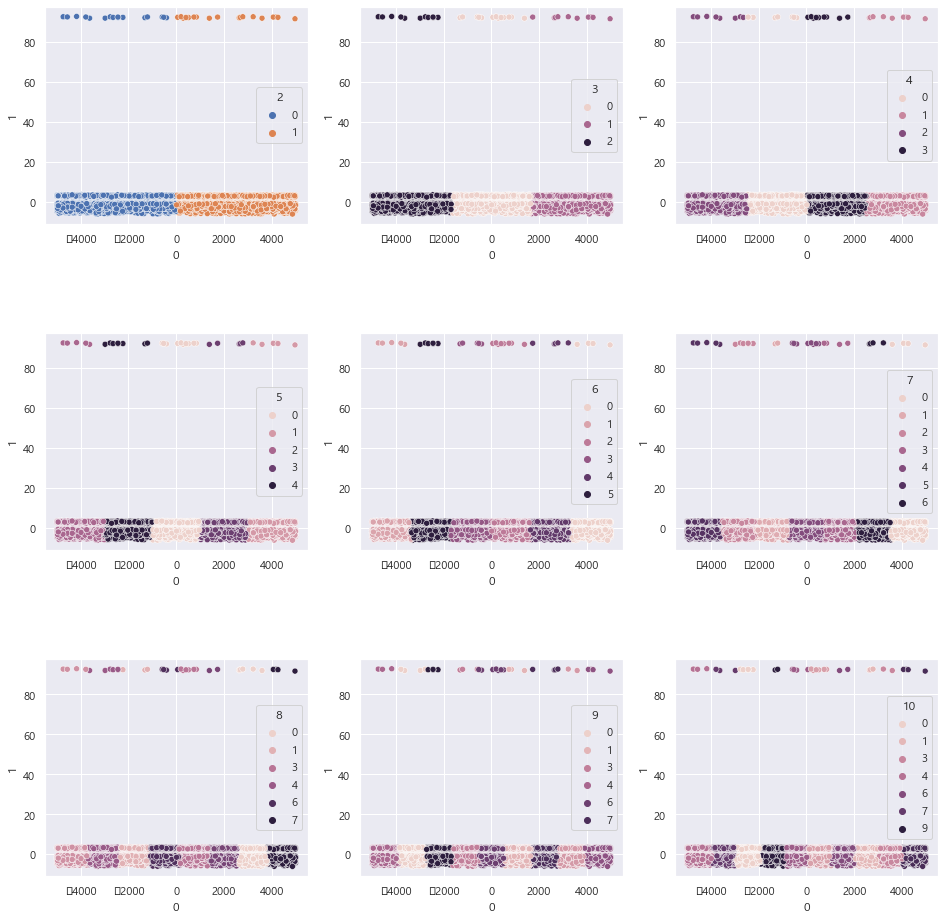

In [20]:
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
for i, col in enumerate(n_clusters):
    r = i // 3
    c = i % 3
    sns.scatterplot(x=0, y=1, hue=col, data=cus_kmeans_pca, ax=ax[r, c])
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i in n_clusters:
    print('n_clusters :', i, ', score =', silhouette_score(cus_kmeans_pca, cus_kmeans_pca[i], random_state=0))

n_clusters : 2 , score = 0.6266408645073188
n_clusters : 3 , score = 0.5900400900967225
n_clusters : 4 , score = 0.5716969637448356
n_clusters : 5 , score = 0.5607047122223766
n_clusters : 6 , score = 0.5532906001564366
n_clusters : 7 , score = 0.5480723492989422
n_clusters : 8 , score = 0.5439441147031187
n_clusters : 9 , score = 0.5409634768051724
n_clusters : 10 , score = 0.5385056506711132


In [28]:
import matplotlib.cm as cm
import math

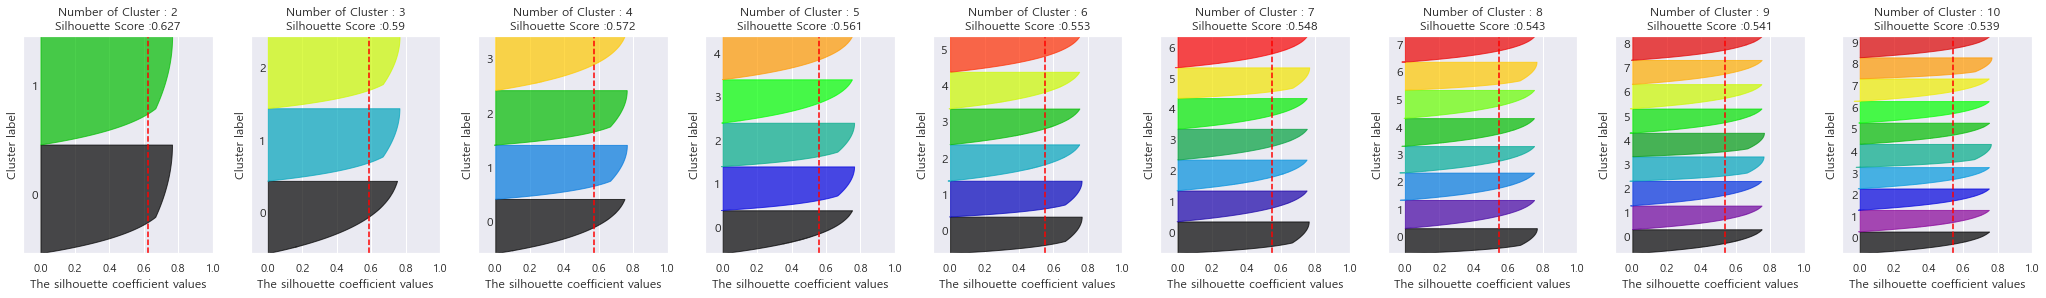

In [29]:
# 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
n_cols = len(n_clusters)

# plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

# 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
for ind, n_cluster in enumerate(n_clusters):

    # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
    clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
    cluster_labels = clusterer.fit_predict(cus_kmeans_pca)

    sil_avg = silhouette_score(cus_kmeans_pca, cluster_labels)
    sil_values = silhouette_samples(cus_kmeans_pca, cluster_labels)

    y_lower = 10
    axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                        'Silhouette Score :' + str(round(sil_avg,3)) )
    axs[ind].set_xlabel("The silhouette coefficient values")
    axs[ind].set_ylabel("Cluster label")
    axs[ind].set_xlim([-0.1, 1])
    axs[ind].set_ylim([0, len(cus_kmeans_pca) + (n_cluster + 1) * 10])
    axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
    axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
    for i in range(n_cluster):
        ith_cluster_sil_values = sil_values[cluster_labels==i]
        ith_cluster_sil_values.sort()

        size_cluster_i = ith_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_cluster)
        axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                            facecolor=color, edgecolor=color, alpha=0.7)
        axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

# EDA

In [ ]:
cus_cols = ['sex_dit_cd', 'cus_age_stn_cd', 'ivs_icn_cd', 'cus_aet_stn_cd', 'mrz_pdt_tp_sgm_cd', 'lsg_sgm_cd', 'tco_cus_grd_cd', 'tot_ivs_te_sgm_cd', 'mrz_btp_dit_cd']
cols     = ['성별', '연령구간', '투자성향', '자산구간', '주거래상품', '라이프구분', '고객등급', '총투자기간', '총투자업종']    

fig, ax = plt.subplots(3, 3, figsize=(20, 8))
for i, col in enumerate(cus_cols):
    r = i // 3
    c = i % 3
    sns.countplot(col, data=cus, ax=ax[r, c])
    ax[r, c].set_title(f'{cols[i]}')
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(20, 8))
for i, col in enumerate(cus_cols) :
    r = i // 3
    c = i % 3
    sns.histplot(data=cus, x=col, hue='sex_dit_cd', ax=ax[r ,c])
    ax[r, c].set_title(f'{cols[i]}')
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# feature engineering

## cus['tco_cus_grd_cd'] : 서비스 등급

In [ ]:
# 서비스 등급 결측치(99)를 자산구간별으로 분배
cus['tco_cus_grd_cd'][(cus['tco_cus_grd_cd'] == 99) & (cus['cus_aet_stn_cd'] == 1)] = 3 # 1억 이상, 3억 미만
cus['tco_cus_grd_cd'][(cus['tco_cus_grd_cd'] == 99) & (cus['cus_aet_stn_cd'] == 2)] = 3 # 1억 이상, 3억 미만

# 서비스 등급 미정의(9)를 자산구간별으로 분배
cus['tco_cus_grd_cd'][(cus['tco_cus_grd_cd'] == 9) & (cus['cus_aet_stn_cd'] == 1)] = 9 # 1천 미만
cus['tco_cus_grd_cd'][(cus['tco_cus_grd_cd'] == 9) & (cus['cus_aet_stn_cd'] == 2)] = 5 # 1천 이상, 3천 미만
cus['tco_cus_grd_cd'][(cus['tco_cus_grd_cd'] == 9) & (cus['cus_aet_stn_cd'] == 3)] = 4 # 3천 이상, 1억 미만
cus['tco_cus_grd_cd'][(cus['tco_cus_grd_cd'] == 9) & (cus['cus_aet_stn_cd'] == 4)] = 4 # 3천 이상, 1억 미만
cus['tco_cus_grd_cd'][(cus['tco_cus_grd_cd'] == 9) & (cus['cus_aet_stn_cd'] == 5)] = 3 # 1억 이상, 3억 미만

# 이외의 서비스 등급 미정의(9)는 고객등급 6으로 설정
cus['tco_cus_grd_cd'][(cus['tco_cus_grd_cd'] == 9)] = 6

In [ ]:
# tco_cus_grd_cd_dict = {1:1, 2:2, 3:3, 4:4, 5:5, 9:9, 99:9}
# cus["tco_cus_grd_cd"] = cus["tco_cus_grd_cd"].map(tco_cus_grd_cd_dict)

## cus['ivs_icn_cd'] : 투자성향

In [ ]:
# 투자성향 미정의(99) 비율 0.3687 -> 재정의 필요
cus[cus['ivs_icn_cd'] == 99].shape[0] / cus.shape[0]
cus.drop('ivs_icn_cd', axis=1, inplace=True)

In [ ]:
# ivs_icn_cd : (거래횟수 / 보유기간)으로 재정의

# train의 hold_d와 test의 hist_d를 합쳐 total_hold 구성
grp_train_test = pd.concat([train[['act_id', 'iem_cd', 'hold_d']], test[['act_id', 'iem_cd', 'hist_d']]]).groupby(by=['act_id', 'iem_cd']).sum()
grp_train_test['total_hold'] = grp_train_test['hold_d'] + grp_train_test['hist_d']

# hist의 계좌/종목별 [거래횟수] 와 train과 test에 있는 계좌/종목별 [보유기간] 합친 dataframe 구성
grp = pd.concat(
    [
        hist.groupby(by=['act_id', 'iem_cd']).count(),
        grp_train_test[['total_hold']],
    ],
    axis=1
)[['bse_dt', 'total_hold']]

# grp['tendency'] : 거래횟수 / 보유기간
grp['tendency'] = grp['bse_dt'] / grp['total_hold'] * 100

# 보유기간이 0인 경우, np.inf를 0으로 대체
grp = grp.replace(np.inf, 0)

# 계좌단위 tendency 평균 : 해당 계좌의 공격적인 성향
grp_mean = grp.groupby('act_id').mean()[['tendency']]

# ivs_icn_cd : 계좌별 공격적인 성향 구간화
grp_mean['ivs_icn_cd'] = pd.cut(grp_mean['tendency'],bins=[0, 25, 75 , 125, 175, 200] , labels=[1, 2, 3, 4, 5])
grp_mean = grp_mean.drop(columns=["tendency"], axis=1)
grp_mean = grp_mean.astype('int64')
grp_mean = grp_mean.reset_index()

# cus에 ivs_icn_cd를 merge
cus = cus.merge(grp_mean, how='left', on='act_id')

## hist['stk_p'] : 매매 평균단가

In [ ]:
hist['stk_p'] = hist['tot_aet_amt'] / hist['bnc_qty']
hist = hist.fillna(0)

## iem['stk_class'] : 개별 종목 / ETF 구분

In [ ]:
iem['stk_class'] = np.nan

In [ ]:
# ETF = 1
iem['stk_class'][iem['iem_krl_nm'].str.contains('tiger', case=False)]   = 1
iem['stk_class'][iem['iem_krl_nm'].str.contains('kindex', case=False)]  = 1
iem['stk_class'][iem['iem_krl_nm'].str.contains('kodex', case=False)]   = 1
iem['stk_class'][iem['iem_krl_nm'].str.contains('kbstar', case=False)]  = 1
iem['stk_class'][iem['iem_krl_nm'].str.contains('arirang', case=False)] = 1
iem['stk_class'][iem['iem_krl_nm'].str.contains('hanaro', case=False)]  = 1
iem['stk_class'][iem['iem_krl_nm'].str.contains('kosef', case=False)]   = 1
iem['stk_class'][iem['iem_krl_nm'].str.contains('sol', case=False)]     = 1
iem['stk_class'][iem['iem_krl_nm'].str.contains('ktop', case=False)]    = 1

# 개별종목 = 0
iem['stk_class'].fillna(0, inplace=True)

## train & test 날짜 분리

In [ ]:
# byn_yr(연도) & byn_mth
train['byn_dt']  = train['byn_dt'].astype('str')
train['byn_yr']  = train['byn_dt'].str[:4]
train['byn_mth'] = train['byn_dt'].str[4:6]

test['byn_dt']   = test['byn_dt'].astype('str')
test['byn_yr']   = test['byn_dt'].str[:4]
test['byn_mth']  = test['byn_dt'].str[4:6]

train['byn_dt']  = train['byn_dt'].astype('int64')
train['byn_yr']  = train['byn_yr'].astype('int64')
train['byn_mth'] = train['byn_mth'].astype('int64')
test['byn_dt']   = test['byn_dt'].astype('int64')
test['byn_yr']   = test['byn_yr'].astype('int64')
test['byn_mth']  = test['byn_mth'].astype('int64')

## train['hist_d']

In [ ]:
train['hist_d'] = np.trunc(train['hold_d'] * 0.7)

# merge

In [ ]:
# train/test merge cus & iem
train_data = pd.merge(train, cus,      how='left', on=['act_id'])
train_data = pd.merge(train_data, iem, how='left', on=['iem_cd'])

test_data = pd.merge(test, cus,      how='left', on=['act_id'])
test_data = pd.merge(test_data, iem, how='left', on=['iem_cd'])

In [ ]:
# train/test merge hist
train_data = pd.merge(train_data, hist, how='left', on=['act_id', 'iem_cd'])
train_data = train_data[(train_data['byn_dt'] == train_data['bse_dt'])]
train_data.reset_index(drop=True, inplace=True)

test_data = pd.merge(test_data, hist, how = 'left', on=['act_id', 'iem_cd'])
test_data = test_data[(test_data['byn_dt'] == test_data['bse_dt'])]
test_data.reset_index(drop=True, inplace=True)

# encode

In [ ]:
le_iem = LabelEncoder()
le_iem.fit(iem['iem_krl_nm'])
train_data['iem_krl_nm'] = le_iem.transform(train_data['iem_krl_nm'])
test_data['iem_krl_nm']  = le_iem.transform(test_data['iem_krl_nm'])

le_act = LabelEncoder()
le_act.fit(cus['act_id'])
train_data['act_id'] = le_act.transform(train_data['act_id'])
test_data['act_id']  = le_act.transform(test_data['act_id'])

# drop

In [ ]:
train_data = train_data.drop(['iem_cd', 'byn_dt', 'mrz_pdt_tp_sgm_cd', 'bse_dt'], axis=1)
test_data  = test_data.drop(['iem_cd', 'byn_dt', 'mrz_pdt_tp_sgm_cd', 'bse_dt', 'submit_id', 'hold_d', 'hist_d'], axis=1)

In [ ]:
train_data.shape, test_data.shape

# scale

In [ ]:
ss = StandardScaler()

ss.fit(train_data[test_data.columns])
train_data[test_data.columns] = ss.transform(train_data[test_data.columns])
test_data[test_data.columns]  = ss.transform(test_data[test_data.columns])

In [ ]:
train_data['hold_d'] = np.log1p(train_data['hold_d'])

# score

In [ ]:
X_train_data = train_data.drop('hold_d', axis=1)
y_train_data = train_data['hold_d']

In [ ]:
models = []

folds = KFold(n_splits=10)
for train_idx, val_idx in folds.split(X_train_data):
    
    train_x = X_train_data.iloc[train_idx, :]
    train_y = y_train_data[train_idx]
    val_x = X_train_data.iloc[val_idx, :]
    val_y = y_train_data[val_idx]
    
    model = LGBMRegressor(objective= "regression",
                          max_depth= 5,
                          n_estimators= 2000,
                          learning_rate= 0.01,
                          num_leaves = 31)
    
    model.fit(train_x, train_y,
              eval_set=[(val_x, val_y)],
              eval_metric=["rmse"],
              early_stopping_rounds=300,
              verbose=500)
    
    models.append(model)

In [ ]:
result = []
for i in models:
    result.append(i.predict(test_data))
predict = np.mean(np.expm1(result), axis=0)

In [ ]:
predict

In [ ]:
break

In [ ]:
sub['hold_d'] = predict

In [ ]:
sub.to_csv('./sub14.csv', index=False)

In [ ]:
# regression GridsearchCV : INPUT TRAIN & TARGET

# split ------------------------------------------------------
X_train_data = train_data.drop('hold_d', axis=1)
y_train_data = train_data['hold_d']

# param_grid= ------------------------------------------------
hyper_param = {
    # 'random_state':[0, 1, 2],
    # 'n_estimators':[100],
    # 'min_samples_split':[2],
    # 'min_samples_leaf':[1],
}

# scoring= ---------------------------------------------------
regression_scoring = {'RMSE':'neg_root_mean_squared_error',}

# GridSearchCV loop ------------------------------------------
regression_gscv_list   = []
fitted_gscv            = []
regression_gscv_models = [
    # LinearRegression         (),
    # DecisionTreeRegressor    (random_state=0),
    # Ridge                    (random_state=0),
    # Lasso                    (random_state=0),
    # ElasticNet               (random_state=0),
    # BaggingRegressor         (random_state=0),
    RandomForestRegressor    (random_state=0),
    # GradientBoostingRegressor(random_state=0),
    XGBRegressor             (random_state=0, verbosity=0),
    XGBRFRegressor           (random_state=0, verbosity=0),
    LGBMRegressor            (random_state=0),
    CatBoostRegressor        (random_state=0, verbose=0),
]

for regression_gscv_model in regression_gscv_models:
    
    gscv = GridSearchCV(
        regression_gscv_model,
        param_grid=hyper_param,
        scoring=regression_scoring,
        refit='RMSE',
        cv=KFold(n_splits=5, shuffle=True, random_state=0),
    )
    
    gscv.fit(X_train_data, y_train_data)
    
    regression_gscv_score = [
        gscv.estimator.__class__.__name__,
        - gscv.best_score_,
        gscv.best_params_,]
    
    regression_gscv_list.append(regression_gscv_score)
    print(gscv.estimator.__class__.__name__, 'fit complete')
    fitted_gscv.append(gscv)

regression_gscv_df = pd.DataFrame(
    regression_gscv_list, columns=['gscv_estimator', 'best_score_', 'best_params_'])
regression_gscv_df

In [ ]:
sub['hold_d'] = np.expm1(gscv.predict(test_data))

In [ ]:
sub

In [ ]:
sub.to_csv('./sub07_scale.csv', index=False)

In [ ]:
# regression GridsearchCV : INPUT TRAIN & TARGET
# ============================================================
train_metrics  = scale_train_data
target_metrics = 'hold_d'
# ============================================================

# split ------------------------------------------------------
X_metrics = train_metrics.drop(target_metrics, axis=1)
y_metrics = train_metrics[target_metrics]

# param_grid= ------------------------------------------------
hyper_param = {
    # 'random_state':[0, 1, 2],
    # 'n_estimators':[100],
    # 'min_samples_split':[2],
    # 'min_samples_leaf':[1],
}

# scoring= ---------------------------------------------------
regression_scoring = {
    # 'MSE':'neg_mean_squared_error',
    'RMSE':'neg_root_mean_squared_error',
    # 'MSLE':'neg_mean_squared_log_error',
    # 'MAE':'neg_mean_absolute_error',
}

# GridSearchCV loop ------------------------------------------
regression_gscv_list   = []
regression_gscv_models = [
    # LinearRegression         (),
    # DecisionTreeRegressor    (random_state=0),
    # Ridge                    (random_state=0),
    # Lasso                    (random_state=0),
    # ElasticNet               (random_state=0),
    # BaggingRegressor         (random_state=0),
    # RandomForestRegressor    (random_state=0),
    # GradientBoostingRegressor(random_state=0),
    # XGBRegressor             (random_state=0, verbosity=0),
    XGBRFRegressor           (random_state=0, verbosity=0),
    # LGBMRegressor            (random_state=0),
    # CatBoostRegressor        (random_state=0, verbose=0),
]

for regression_gscv_model in regression_gscv_models:
    
    gscv = GridSearchCV(
        regression_gscv_model,
        param_grid=hyper_param,
        scoring=regression_scoring,
        refit='RMSE',
        cv=KFold(n_splits=5, shuffle=True, random_state=0),
    )
    
    gscv.fit(X_metrics, y_metrics)
    
    regression_gscv_score = [
        gscv.estimator.__class__.__name__,
        - gscv.best_score_,
        gscv.best_params_,]
    
    regression_gscv_list.append(regression_gscv_score)
    print(gscv.estimator.__class__.__name__, 'fit complete')

regression_gscv_df = pd.DataFrame(
    regression_gscv_list, columns=['gscv_estimator', 'best_score_', 'best_params_'])
regression_gscv_df

In [ ]:
sub['hold_d'] = np.expm1(gscv.predict(test_data))

In [ ]:
sub

In [ ]:
sub.to_csv('./sub10_scale.csv', index=False)

In [ ]:
scale_train_label = scale_train_data['hold_d']
scale_train_data  = scale_train_data.drop(["hold_d"], axis=1)

In [ ]:
predict

In [ ]:
sub['hold_d'] = predict

In [ ]:
sub

In [ ]:
sub.to_csv('./sub11_scale.csv', index=False)

In [ ]:
models = []

folds = KFold(n_splits=10)
for train_idx, val_idx in folds.split(scale_train_data):
    
    train_x = scale_train_data.iloc[train_idx, :]
    train_y = scale_train_label[train_idx]
    val_x = scale_train_data.iloc[val_idx, :]
    val_y = scale_train_label[val_idx]
    
    model = RandomForestRegressor(
                          max_depth= 5,
                          n_estimators= 2000,
                          max_leaf_nodes = 31)
    
    model.fit(train_x, train_y)
    
    models.append(model)

In [ ]:
result = []
for i in models:
    result.append(i.predict(test_data))
predict = np.mean(np.expm1(result), axis = 0)

In [ ]:
break

# hist의 volume, profit_rate, close

In [ ]:
hist['volume']      = np.nan  # 체결량 : (+) 매수, (-) 매도
hist['profit_rate'] = np.nan  # 수익률
hist['close']       = np.nan  # 종가

hist.loc[753124:753133, 'close'] = [26050, 26050, 36450, 48100, 49850, 95600, 85000, 84600, 72000, 72500]

act_id = '0007f3d10282e6f9de1eb445a64eb1f13e9ed2308cfbfa9b6e6efa399d0bdf31'
iem_cd = 'A033270'

# volume = bnc_qty diff
hist['volume'] = hist[
    (hist['act_id'] == act_id) &
    (hist['iem_cd'] == iem_cd) 
].sort_values(by=['iem_cd', 'bse_dt'])[['bnc_qty']].diff()

# profit_rate = close pct_change()
hist['profit_rate'] = np.round(hist[
    (hist['act_id'] == act_id) & (hist['iem_cd'] == iem_cd) 
]['close'].pct_change() * 100, 2)

# 첫 거래 : bnc_qty = volume, profit_rate = 0
idx = hist[(hist['act_id'] == act_id) & (hist['iem_cd'] == iem_cd)].head(1).index
hist.loc[idx, 'volume'] = hist.loc[idx, 'bnc_qty']
hist.loc[idx, 'profit_rate'] = 0

In [ ]:
hist[
    (hist['act_id'] == act_id) &
    (hist['iem_cd'] == iem_cd) 
].sort_values(by=['iem_cd', 'bse_dt'])

In [ ]:
desc = pd.DataFrame(
    {
        'describe':[113.240849, 1.000000, 14.000000, 56.000000, 131.000000, 1227.000000, ]
    },
    index=['mean', 'min', '25%', '50%', '75%', 'max']
)

In [ ]:
desc['min'] = desc['describe'] / (desc['describe'] + 146)
desc['max'] = desc['describe'] / (desc['describe'] + 1)

In [ ]:
desc

In [ ]:
test['hist_d'].hist()  # drop : min, max, 

In [ ]:
test['hist_d_max_pct'] = test['hist_d'] / (test['hist_d'] + 1)
test['hist_d_min_pct'] = test['hist_d'] / (test['hist_d'] + 146)

In [ ]:
test['hist_d_min_pct'].hist(bins=50)

In [ ]:
test['hist_d_max_pct'].hist(bins=50)